## I. Dataset Description

The dataset acquired covers the possible key indicators of heart disease among US citizens. The dataset is a public online resource available on Kaggle.com and was acquired from the Center for Disease Control and Prevention (CDC), a government organization of the United States taking part in the Behavioral Risk Factor Surveillance System (BRFSS). The data was acquired observationally as there was no form of treatment applied to the respondents. The collection was done via an annual telephone survey in all 50 states plus the District of Columbia and three more U.S. territories. Moreso, the dataset contains 319,795 rows and 18 columns with each row representing an observation of a person and the columns representing the responses of the individual to different questions about their health status. The answers of the respondents are valued as 9 booleans, 5 strings, and 4 decimals. No other external files are combined with the single file for this machine project. 

## II. Data Cleaning
The following code blocks are for importing the necessary libraries as well as the dataset needed.

In [1]:
import numpy as np
import pandas as pd

In [2]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")

The next segment displays general information within the dataset and the datatypes of the various features.

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


The dataset has already been cleaned beforehand as stated by the dataset's authors, however, the procedures for data cleaning discussed in class will still be performed to ensure that the data is clean.

### Checking for missing values

In [5]:
heart_df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

### Checking for inconsistencies and multiple representations

In [6]:
print("No. of unique values per column:\n",heart_df.nunique())

No. of unique values per column:
 HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


Checking for all the unique values for each variable

### Heart Disease

In [7]:
heart_df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

### BMI

In [13]:
heart_df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

### Smoking

In [14]:
heart_df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

### Alcohol Drinking

In [15]:
heart_df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

### Stroke

In [16]:
heart_df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

### Physical Health

In [17]:
heart_df['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

### Mental Health

In [18]:
heart_df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

### Difficulty Walking

In [19]:
heart_df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

### Sex

In [20]:
heart_df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

### Age Category

In [21]:
heart_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

### Race

In [22]:
heart_df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

### Diabetic

In [23]:
heart_df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

### Physical Activity

In [24]:
heart_df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

### General Health

In [25]:
heart_df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

### Sleep Time

In [26]:
heart_df['SleepTime'].unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

### Asthma

In [27]:
heart_df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

### Kidney Disease

In [28]:
heart_df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

### Skin Cancer

In [29]:
heart_df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

Based on the results above, the data does not contain any missing values. Also, all features contain valid entries and datatypes. 

## III. Exploratory Data Analysis

The group has identified several questions which would be answered through exploratory data analysis. The following code segments show the libraries to be imported.

In [8]:
import matplotlib.pyplot as plt
# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

%matplotlib inline

Since some columns contain boolean values, we must first apply one-hot encoding to aid in the analysis.

In [65]:
heart_df = heart_df.replace({'Yes': 1, 'No':0})
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


### Is there a relationship between heart disease and BMI?

Body Mass Index (BMI) refers to the measure of body fat based on an individual's weight and height. It has four different categories: underweight, normal weight, overweight, and obesity. People with BMIs that are <18.5 are considered underweight, while an index between 18.5-24.9 fall under normal weight. On the other hand, values from 25-29.9 would fall under overweight. Lastly, a BMI of 30 or greater would fall under obesity.

Given this, we would like to find out if the dataset shows a relationship between heart disease and an individual's BMI.

To answer this question, we must group the entire dataset accordingly.

In [66]:
hd_bmi = heart_df[['HeartDisease', 'BMI']]
hd_bmi

,HeartDisease,BMI
0,0,16.60
1,0,20.34
2,0,26.58
3,0,24.21
4,0,23.71
...,...,...
319790,1,27.41
319791,0,29.84
319792,0,24.24
319793,0,32.81


The correlation between the two is calculated as follows:

In [67]:
hd_bmi.corr()

,HeartDisease,BMI
HeartDisease,1.000000,0.051803
BMI,0.051803,1.000000


The calculated correlation between the two variables is **0.0518**. From the result, the two variables are positively correlated. However, the r-value suggests a weak relationship between the two variables.

The frequency of between the two variables can be shown by the following:

Text(0.5, 1.0, 'BMI')

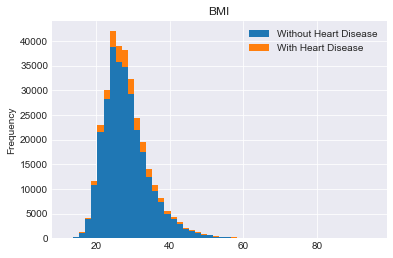

In [60]:
pd.DataFrame({'Without Heart Disease': hd_bmi.groupby('HeartDisease').get_group(0).BMI,
              'With Heart Disease':   hd_bmi.groupby('HeartDisease').get_group(1).BMI}).plot.hist(bins=50, stacked=True)
plt.title('BMI')

Based on the histogram above, however, it can be observed that people with heart disease are shown to have a higher BMI than those without.